In [299]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import re
import numpy as np

In [300]:
df = pd.read_csv("../data/DataScientist.csv")

print(df.shape)
df.head(3)
df = df.drop(['Unnamed: 0', "index"], axis = 1)
df.head()

(3909, 17)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [301]:
# Clean Company Names

def cleanCompName(name): 
    if name.find("\n") != -1:
        newname = name[0:name.find("\n")]
    else:
        newname = name
    return newname

df["Company Name"] = df["Company Name"].map(cleanCompName)

In [302]:
def ersetze_kurznamen(kurzname):
    us_bundesstaaten = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'IA': 'Iowa',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MS': 'Mississippi',
        'MO': 'Missouri',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NV': 'Nevada',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming',
        '-1': 'Unknown'
    }
    
    if kurzname in us_bundesstaaten:
        return us_bundesstaaten[kurzname] + ", USA"
    else:
        return kurzname

In [303]:
#df["State Location"] = df.Location.apply(lambda x : x[-2:])

df["State Headquarter"] = df.Headquarters.apply(lambda x : x.split()[-1]).apply(lambda x : x if x != "Kingdom" else "United Kingdom").apply(lambda x : ersetze_kurznamen(x))
df["State Location"] = df.Location.apply(lambda x : x.split()[-1]).apply(lambda x : x if x != "Kingdom" else "United Kingdom").apply(lambda x : ersetze_kurznamen(x))
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Canada,"New York, USA"
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,"New York, USA","New York, USA"
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,"New York, USA","New York, USA"
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,"New Jersey, USA","New Jersey, USA"
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,"New York, USA","New York, USA"


In [304]:
# convert min and max salary to numbers

def averageSalary(salary):
    min_salary = int(re.findall(r'\d+', salary)[0])
    max_salary = int(re.findall(r'\d+', salary)[1])
    average_salary = (min_salary + max_salary) / 2 * 1000
    #min_salary = min_salary[1:]
    #min_salary = int(min_salary)
    return average_salary

df["average_salary"] = df["Salary Estimate"].apply(averageSalary)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location,average_salary
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Canada,"New York, USA",146000.0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,"New York, USA","New York, USA",146000.0
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,"New York, USA","New York, USA",146000.0
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,"New Jersey, USA","New Jersey, USA",146000.0
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,"New York, USA","New York, USA",146000.0


In [305]:
df.keys()

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'State Headquarter', 'State Location', 'average_salary'],
      dtype='object')

In [341]:
# Create Compare Title
df["Compare Title"] = ""

for job in df["Job Title"]:
    
    pattern = r'[^a-zA-Z0-9\s]'  # Pattern, das auf alle Sonderzeichen passt
    job2 = re.sub(pattern, ' ', job)
    
    jobsplit = job2.split()
    if "Data" and "Scientist" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"

    elif "Data" and "Science" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"
        
    elif "Data" and "Sciences" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"
    
    elif "Data" and "Scientist," in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Scientist"
        
    elif "Data" and "Analyst" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Analyst"
        
    elif "Analytics" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Analyst"

    elif "Quantitative" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Quantitative Researcher"
        
    elif "Data" and "Engineer" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Engineer"
        
    elif "Machine" and "Learning" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Machine Learning Engineer"
        
    elif "Consultant" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Consultant"
        
    elif "Consulting" in jobsplit:
        df.loc[df["Job Title"] == job, "Compare Title"] = "Data Consultant"
        
df = df[df["Compare Title"] != ""]
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location,average_salary,Compare Title
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,Unknown,Unknown,Canada,"New York, USA",146000.0,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,Unknown,Unknown,"New York, USA","New York, USA",146000.0,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,Unknown,Unknown,Unknown,Unknown,Unknown / Non-Applicable,Unknown,True,"New York, USA","New York, USA",146000.0,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",Unknown,"New Jersey, USA","New Jersey, USA",146000.0,Data Analyst
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",Unknown,"New York, USA","New York, USA",146000.0,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),Unknown,Unknown,"Texas, USA","Ohio, USA",83500.0,Data Engineer
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),Unknown,Unknown,"Illinois, USA","Ohio, USA",83500.0,Data Analyst
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),Unknown,Unknown,"Texas, USA","Ohio, USA",83500.0,Data Analyst
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,"Dublin, OH","Omaha, NE",1 to 50 employees,Unknown,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),Unknown,Unknown,"Nebraska, USA","Ohio, USA",83500.0,Data Analyst


In [449]:
colors = [
    '#0000FF',  # Blue
    '#3366FF',
    '#6699FF',
    '#99CCFF',
    '#CCE5FF',
    '#E6F2FF',
    '#E6FFE6',
    '#CCEEB3',
    '#99E580',
    '#66CC4D',
    '#33B319',
    '#009900',  # Green
]

def plotlyplot(df,number,title):
    fig = go.Figure()
    fig.add_trace(go.Bar(x = df[df.columns[0]][:number], y = df[df.columns[1]][:number], marker_color = colors))

    fig.update_layout(font_size = 16, height = 800, width = 1000, title = title, title_x = 0.5)

    fig.show()
    
def plotlyscatter(df,title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[df.columns[0]], y=df[df.columns[1]], mode='markers', marker_color = colors))

    fig.update_layout(font_size = 16, height = 800, width = 1000, title = title, title_x = 0.5)

    fig.show()
    
def plotlyscatterz(df,title, factor = 1):
    #sizeref = 10 #2 * max(df[df.columns[2]]) / (10 * factor ** 2)
    scaler = 1/factor
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[df.columns[0]], y=df[df.columns[1]], mode='markers',
                         marker = {  
                            "sizemode": "area", 
                            "size": df[df.columns[2]], 
                            "sizeref": scaler
                             },
                             hovertemplate=
                            "%{x}<br>" +
                            "%{y}<br>" +
                            "%{marker.size:,}" +
                            "<extra></extra>"
                            ))

    fig.update_layout(font_size = 16, height = 800, width = 1000, title = title, title_x = 0.5)

    fig.show()
    
    
                                #"sizeref": max(ds_e2['petal_length'])*0.01

In [343]:
# disabling all -1 values

df["Rating"] = df["Rating"].apply(lambda x : float(x)).apply(lambda x : x if x != -1 else 0)

df["Founded"] = df["Founded"].apply(lambda x : x if x != -1 else "Unknown")
df["Sector"] = df["Sector"].apply(lambda x : x if x != "-1" else "Unknown")
df["Industry"] = df["Industry"].apply(lambda x : x if x != "-1" else "Unknown")
df["Competitors"] = df["Competitors"].apply(lambda x : x if x != "-1" else "Unknown")
df["Easy Apply"] = df["Easy Apply"].apply(lambda x : x if x != "-1" else "Unknown")

## Which Job Titles and which Keywords are being used?

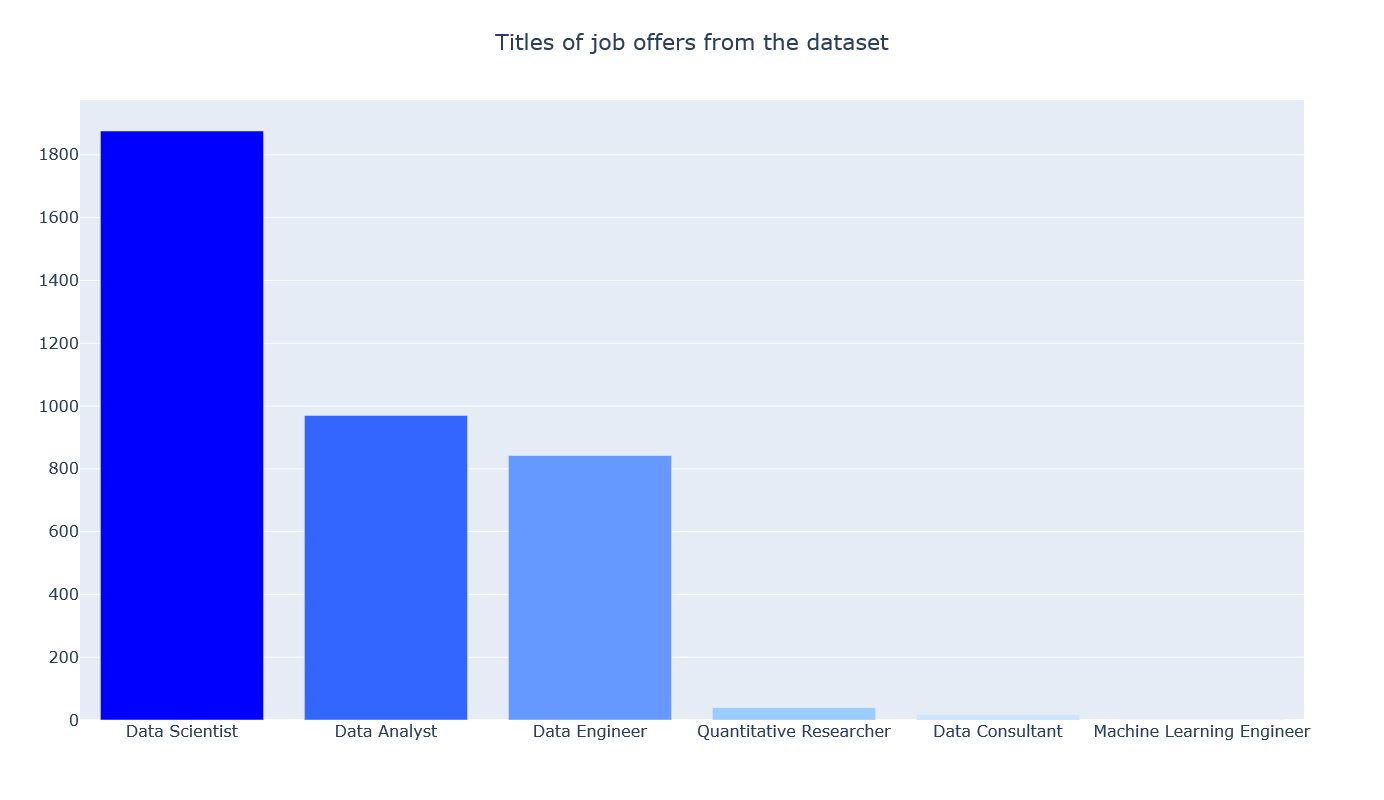

In [344]:
# Which titles are used for the jobs?
jobs_names_df = pd.DataFrame(df["Compare Title"].value_counts().reset_index())

jobs_names_df.columns = ["Job Title","Count"]
jobs_names_df["Job Title"].replace("", np.nan, inplace = True)
jobs_names_df.dropna(subset = ["Job Title"], inplace = True)
plotlyplot(jobs_names_df, 10, "Titles of job offers from the dataset")

### Which companies are offering the most positions?

In [374]:
pos_by_cpy = pd.DataFrame(df["Company Name"].value_counts()).reset_index()
pos_by_cpy.columns = ["Company","Count"]
#plotlyplot(pos_by_cpy,10, "Number of Job Offerings by Company")

top_cpy_df = df["Company Name"].value_counts().head(10).reset_index()
top_cpy_df.columns = ["Company","Count"]
top_cpy_list = [] 
for company in top_cpy_df["Company"]:
    top_cpy_list = top_cpy_list + [company]
top_cpy_list

['Apple',
 'IBM',
 'Amazon',
 'Staffigo Technical Services, LLC',
 'Facebook',
 'Solekai Systems Corp',
 'Diverse Lynx',
 'Varsity Tutors',
 'Humana',
 'CyberCoders']

In [380]:
title_by_company = df_c.groupby(by = ["Company Name", "Compare Title"])["Location"].count().reset_index()
title_by_company = title_by_company[title_by_company["Company Name"].isin(top_cpy_list)]
title_by_company

,Company Name,Compare Title,Location
119,Amazon,Data Analyst,1
120,Amazon,Data Engineer,7
121,Amazon,Data Scientist,39
157,Apple,Data Analyst,2
158,Apple,Data Engineer,20
159,Apple,Data Scientist,37
563,CyberCoders,Data Analyst,3
564,CyberCoders,Data Engineer,5
565,CyberCoders,Data Scientist,10
640,Diverse Lynx,Data Analyst,5


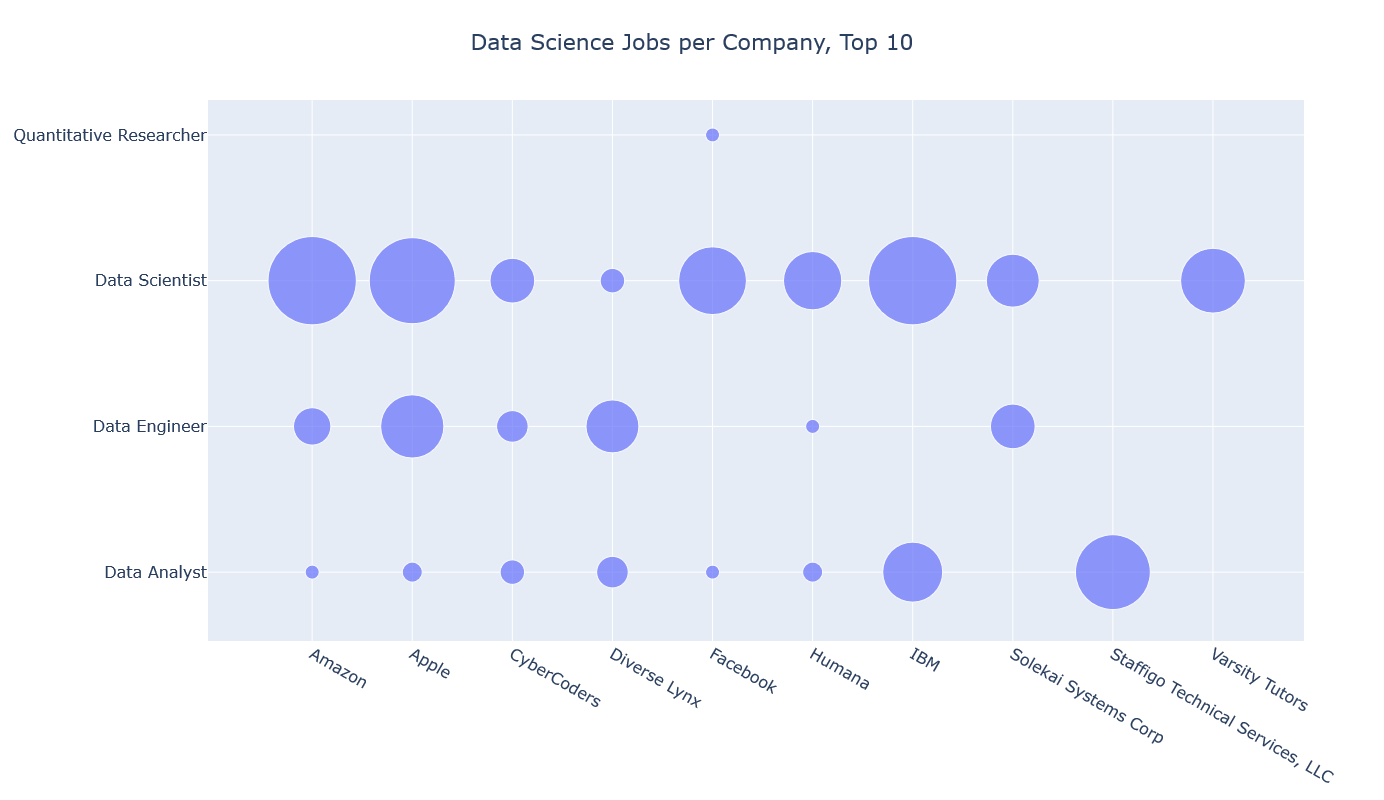

In [454]:
plotlyscatterz(title_by_company, "Data Science Jobs per Company, Top 10", 100)

In [313]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location,average_salary,Compare Title
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,Unknown,Unknown,Canada,"New York, USA",146000.0,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,Unknown,Unknown,"New York, USA","New York, USA",146000.0,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,Unknown,Unknown,Unknown,Unknown,Unknown / Non-Applicable,Unknown,True,"New York, USA","New York, USA",146000.0,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",Unknown,"New Jersey, USA","New Jersey, USA",146000.0,Data Analyst
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",Unknown,"New York, USA","New York, USA",146000.0,Data Scientist


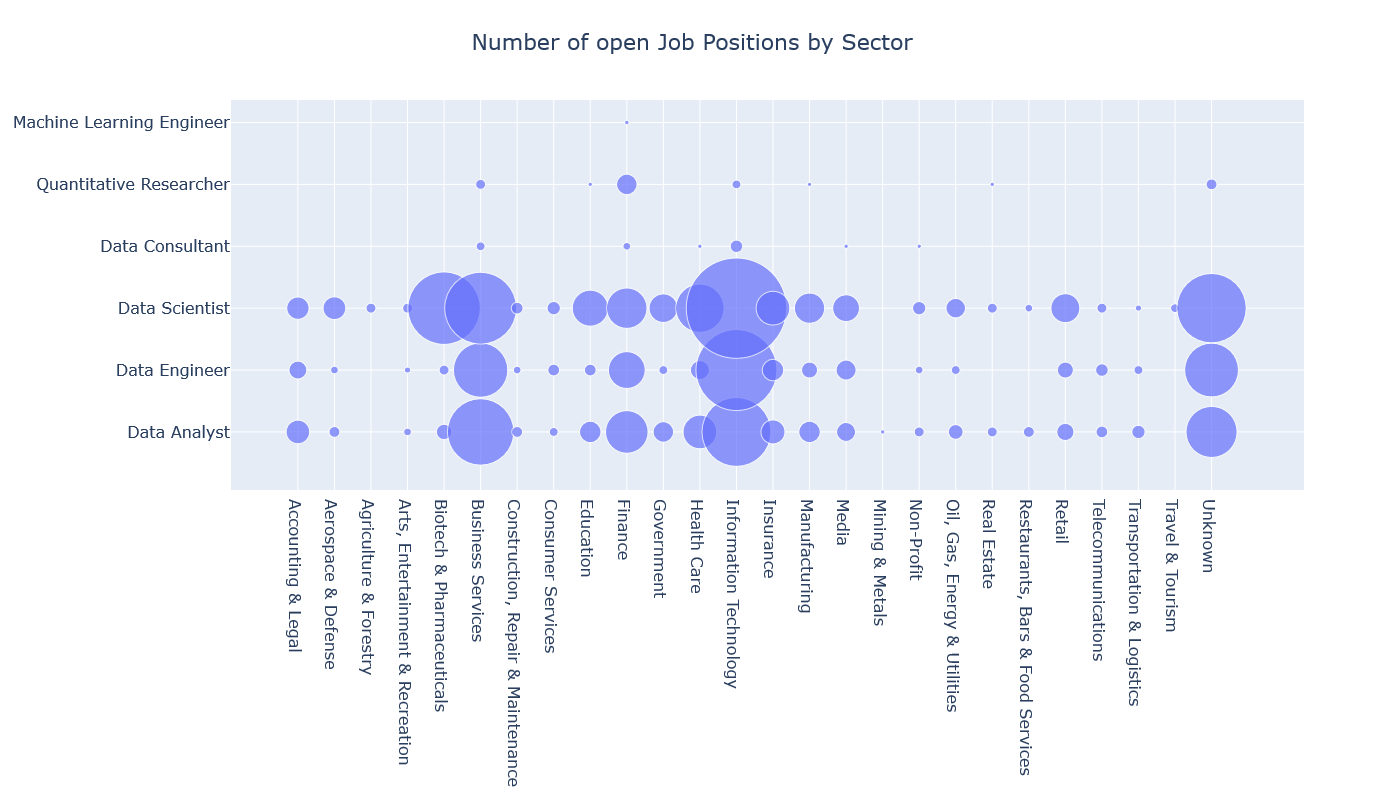

In [554]:
df_c = df[df["Compare Title"] != ""]
title_by_sector = df_c.groupby(by = ["Sector", "Compare Title"])["Location"].count().reset_index()

plotlyscatterz(title_by_sector, "Number of open Job Positions by Sector", 10)

### Which companies are rated the highest? -> Not Representative

In [546]:
def to_df(series,column1, column2):
    df1 = pd.DataFrame(series).reset_index()
    df1.columns = [column1, column2]
    return df1

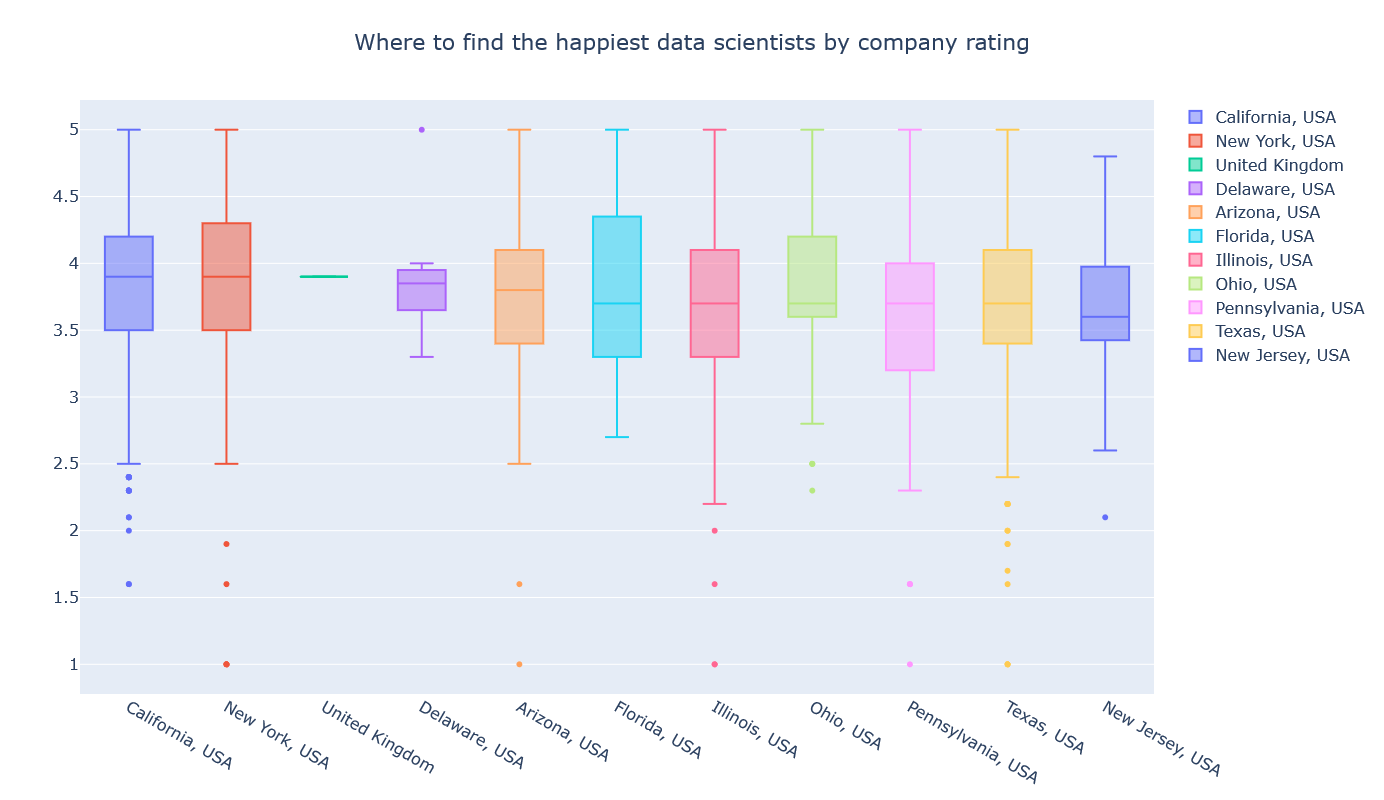

In [548]:
df_states_sorted_by_mean = df2.groupby("State Location")["Rating"].median().sort_values(ascending = False).reset_index()
states_sorted_by_median = df_states_sorted_by_mean["State Location"].unique()

ratings_list = {}
fig = go.Figure()


for state in states_sorted_by_median:
    dfx = df2[df2["State Location"]==state].Rating
    ratings_list[state] = dfx
    fig.add_trace(go.Box(y=dfx, name = state))

fig.update_layout(font_size = 16, height = 800, width = 1000, title = "Where to find the happiest data scientists by company rating", title_x = 0.5)
    
fig.show()

### Which companies pay most based on average salary estimate?

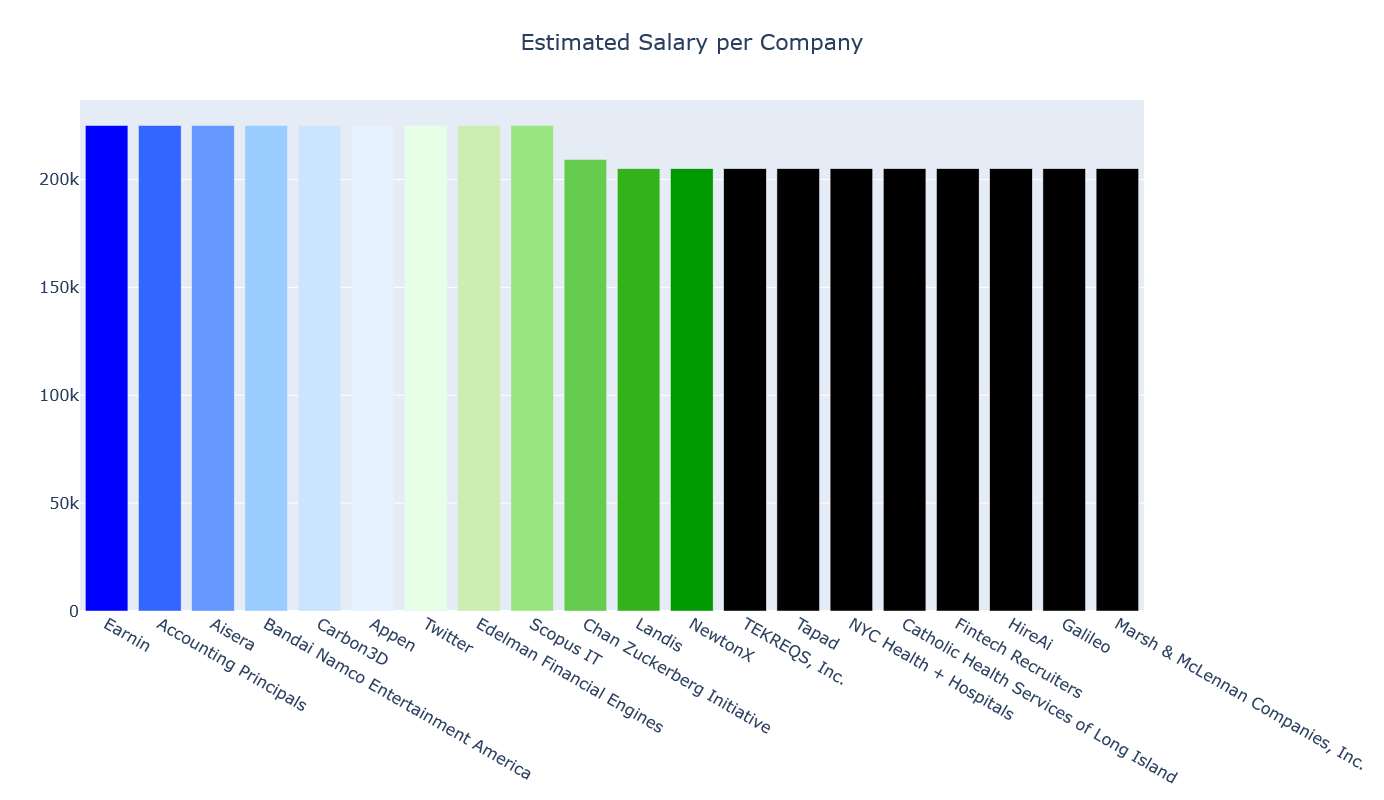

In [319]:
payment = df.groupby(by = ["Company Name"]).average_salary.mean().sort_values(ascending = False)

payment_df = to_df(payment, "Company","Payment")
plotlyplot(payment_df,20, "Estimated Salary per Company")

### Which industry pays most?

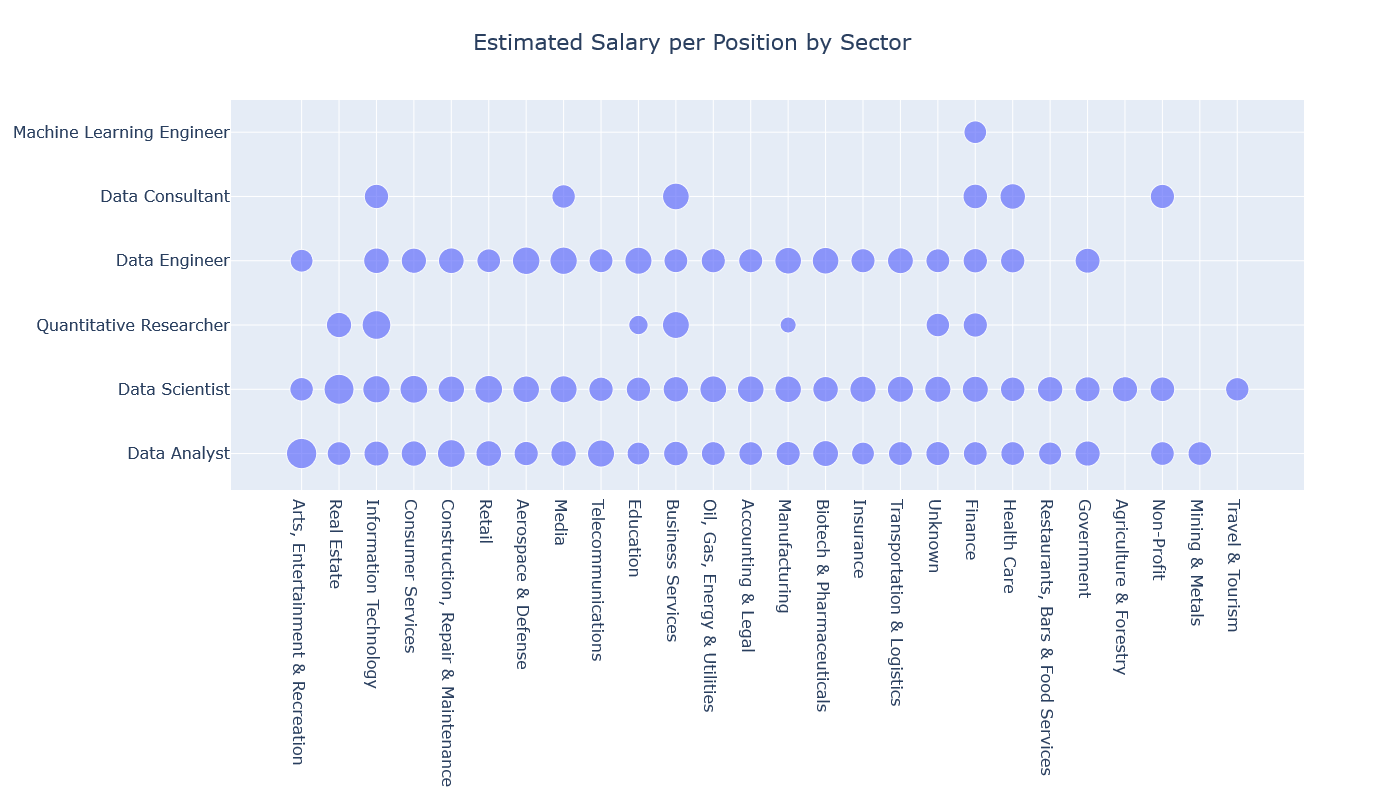

In [563]:
industrypay = df.groupby(by = ["Sector", "Compare Title"]).average_salary.mean().sort_values(ascending = False).round(2)

industrypay_df = pd.DataFrame(industrypay[1:]).reset_index()
industrypay_df.columns = ["Sector","Title","Payment"]
industrypay_df
plotlyscatterz(industrypay_df, "Estimated Salary per Position by Sector", 0.003)

### In which state do you earn the most money as a Data Scientist?

In [324]:
money_state = df.groupby(by = ["State Location"]).average_salary.mean().sort_values(ascending = False).round(2).reset_index()
money_state

,State Location,average_salary
0,"New York, USA",135677.32
1,"Delaware, USA",133550.00
2,"California, USA",132782.97
3,"New Jersey, USA",118687.50
4,United Kingdom,99625.00
5,"Arizona, USA",97349.15
6,"Texas, USA",95347.17
7,"Pennsylvania, USA",94675.93
8,"Ohio, USA",94093.22
9,"Illinois, USA",85004.13


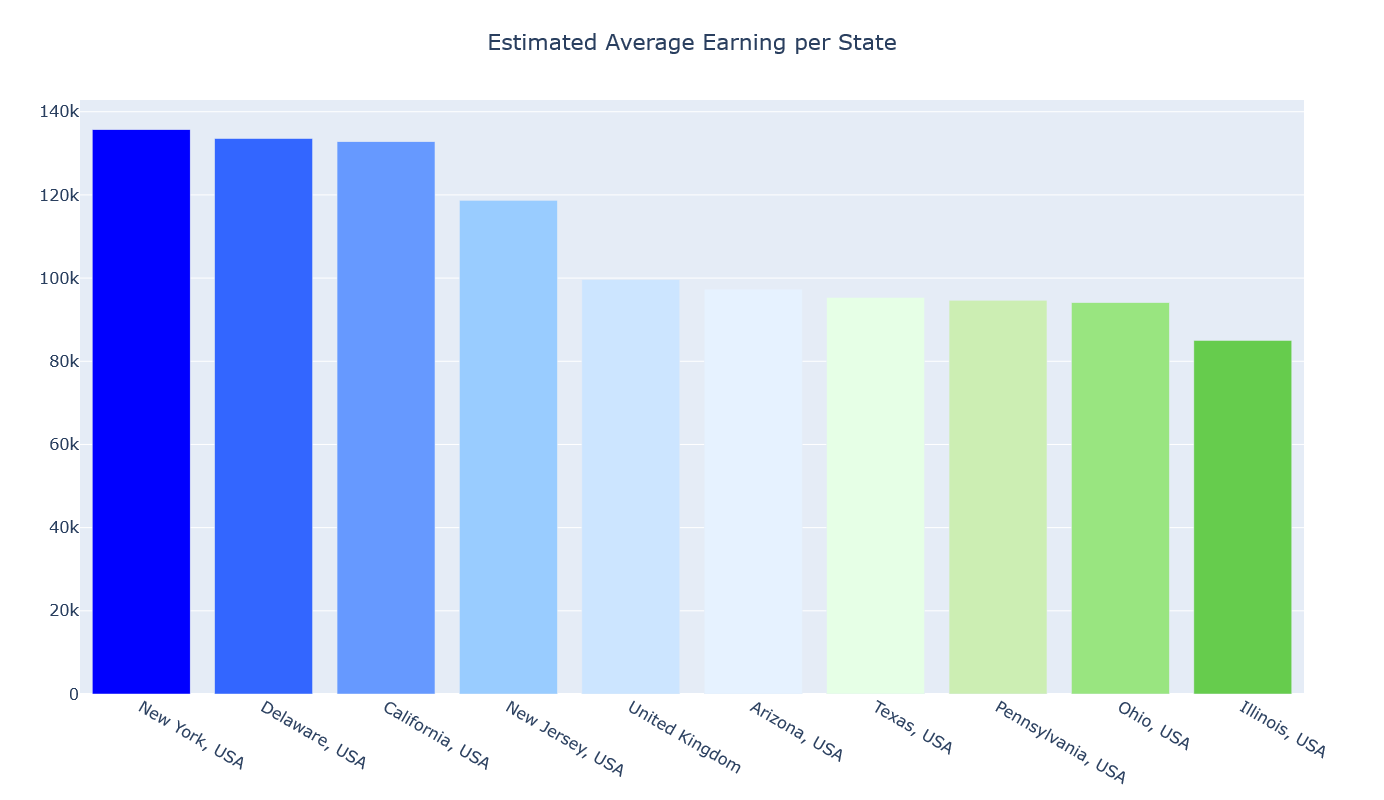

In [325]:
plotlyplot(money_state, 10, "Estimated Average Earning per State")

### In which state are the Data Science Companies located?

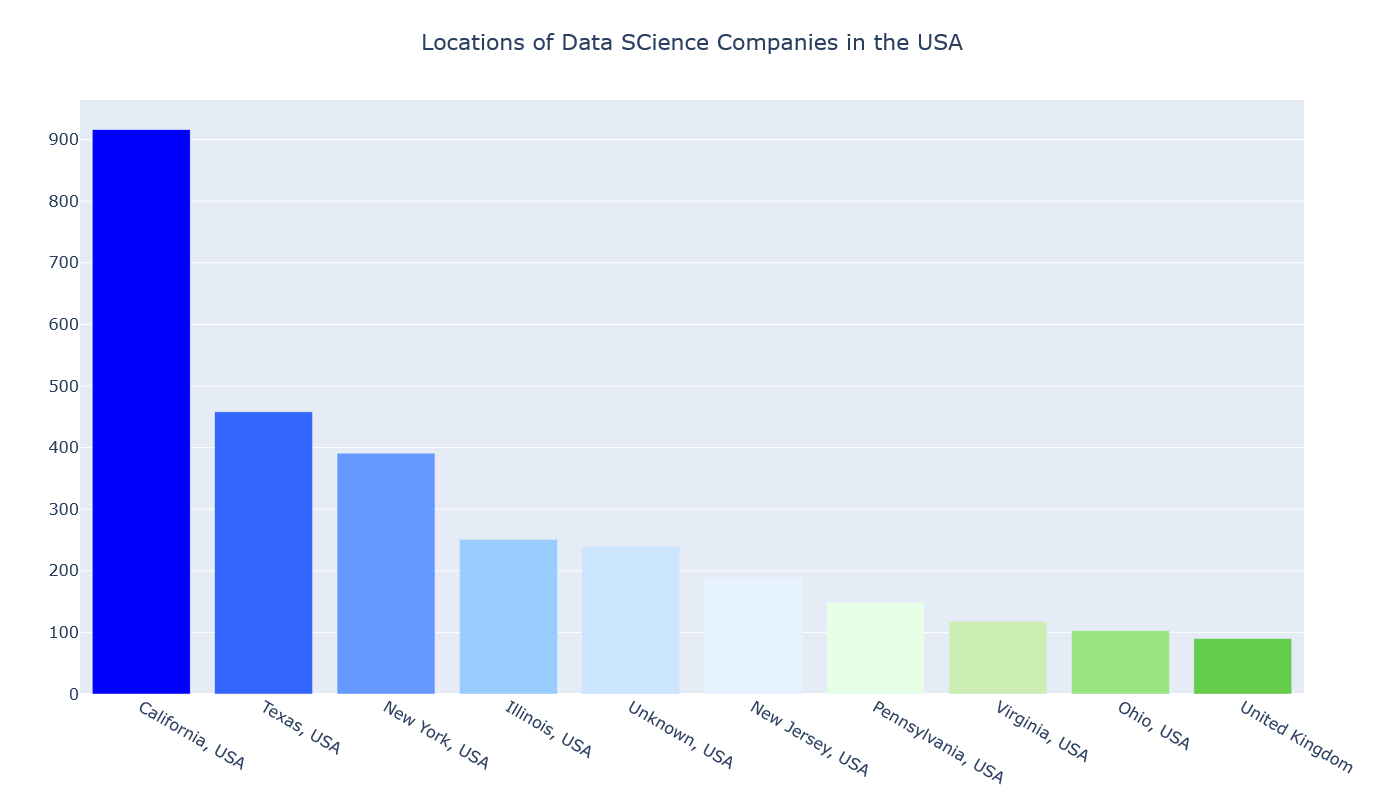

In [326]:
ds_locations = df["State Headquarter"].value_counts().reset_index()
plotlyplot(ds_locations, 10, "Locations of Data SCience Companies in the USA")

# do map plot here

In [327]:
keywords_skills = {
    'airflow': 'Airflow', 'alteryx': 'Alteryx', 'aspnet': 'ASP.NET', 'atlassian': 'Atlassian', 
    'excel': 'Excel', 'powerbi': 'Power BI', 'tableau': 'Tableau', 'srss': 'SRSS', 'word': 'Word', 
    'unix': 'Unix', 'vue': 'Vue', 'jquery': 'jQuery', 'linuxunix': 'Linux / Unix', 'seaborn': 'Seaborn', 
    'microstrategy': 'MicroStrategy', 'spss': 'SPSS', 'visio': 'Visio', 'gdpr': 'GDPR', 'ssrs': 'SSRS', 
    'spreadsheet': 'Spreadsheet', 'aws': 'AWS', 'hadoop': 'Hadoop', 'ssis': 'SSIS', 'linux': 'Linux', 
    'sap': 'SAP', 'powerpoint': 'PowerPoint', 'sharepoint': 'SharePoint', 'redshift': 'Redshift', 
    'snowflake': 'Snowflake', 'qlik': 'Qlik', 'cognos': 'Cognos', 'pandas': 'Pandas', 'spark': 'Spark', 'outlook': 'Outlook'
}

keywords_programming = {
    'sql' : 'SQL', 'python' : 'Python', 'r' : 'R', 'c':'C', 'c#':'C#', 'javascript' : 'JavaScript', 'js':'JS', 'java':'Java', 
    'scala':'Scala', 'sas' : 'SAS', 'matlab': 'MATLAB', 'c++' : 'C++', 'perl' : 'Perl','go' : 'Go',
    'typescript' : 'TypeScript','bash':'Bash','html' : 'HTML','css' : 'CSS','php' : 'PHP','powershell' : 'Powershell',
    'rust' : 'Rust', 'kotlin' : 'Kotlin','ruby' : 'Ruby','dart' : 'Dart','assembly' :'Assembly',
    'swift' : 'Swift','vba' : 'VBA','lua' : 'Lua','groovy' : 'Groovy','delphi' : 'Delphi','objectivec' : 'Objective-C',
    'haskell' : 'Haskell','elixir' : 'Elixir','julia' : 'Julia','clojure': 'Clojure','solidity' : 'Solidity',
    'lisp' : 'Lisp','f#':'F#','fortran' : 'Fortran','erlang' : 'Erlang','apl' : 'APL','cobol' : 'COBOL',
    'ocaml': 'OCaml','crystal':'Crystal','javascripttypescript' : 'JavaScript / TypeScript','golang':'Golang',
    'nosql': 'NoSQL', 'mongodb' : 'MongoDB','tsql' :'Transact-SQL','vba' : 'Visual Basic',
    'pascal':'Pascal', 'mongo' : 'Mongo', 'plsql' : 'PL/SQL','sass' :'SASS', 'vbnet' : 'VB.NET','mssql' : 'MSSQL',
}

In [602]:
def find_keywords(job_title):
    word_count = {}

    for job_desc_text in df[df["Compare Title"] == job_title]["Job Description"]:

        job_desc_text = job_desc_text.translate(job_desc_text.maketrans("", "", "!$%&'()*,-./:;<=>?@[\]^`{|}~"))
        job_desc_text = job_desc_text.lower()
        job_desc_words = job_desc_text.split()

        for word in job_desc_words:
            if word in keywords_programming.keys():
                word_count[word] = word_count.get(word, 0) + 1

            if word in keywords_skills.keys():
                word_count[word] = word_count.get(word, 0) + 1
    return word_count

kw_ds = find_keywords("Data Scientist")
kw_ds_df = pd.DataFrame(kw_ds)

ValueError: If using all scalar values, you must pass an index

In [600]:
df_existing = pd.DataFrame({'Data Scientist': ['John', 'Jane', 'Alice']})

# Convert dictionary to DataFrame
df_new = pd.DataFrame.from_dict(kw_ds, orient='index', columns=['Skills'])

# Reset the index as a new column
df_new = df_new.reset_index().rename(columns={'index': 'Skill'})

# Merge the existing DataFrame with the new DataFrame based on the index
df_merged = pd.merge(df_existing, df_new, how='left', left_on='Data Scientist', right_on='Skill')

# Print the resulting DataFrame
print(df_merged)

  Data Scientist Skill  Skills
0           John   NaN     NaN
1           Jane   NaN     NaN
2          Alice   NaN     NaN


In [597]:
job_list = {}
for job in df["Compare Title"].unique():
    job_list[job] = find_keywords(job)
    
df5 = pd.json_normalize(job_list)
#words_Data_Science = find_keywords("Data Analyst")
df5

,Data Scientist.tableau,Data Scientist.sql,Data Scientist.pandas,Data Scientist.r,Data Scientist.sas,Data Scientist.python,Data Scientist.powerpoint,Data Scientist.linux,Data Scientist.hadoop,Data Scientist.spark,...,Machine Learning Engineer.tableau,Machine Learning Engineer.airflow,Machine Learning Engineer.aws,Machine Learning Engineer.sql,Machine Learning Engineer.python,Machine Learning Engineer.spark,Machine Learning Engineer.r,Machine Learning Engineer.scala,Machine Learning Engineer.java,Machine Learning Engineer.sas
0,241,855,109,811,235,1301,67,99,230,393,...,3,2,3,4,3,7,1,1,1,1


In [329]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State Headquarter,State Location,average_salary,Compare Title
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,Unknown,Unknown,Canada,"New York, USA",146000.0,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,Unknown,Unknown,"New York, USA","New York, USA",146000.0,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,Unknown,Unknown,Unknown,Unknown,Unknown / Non-Applicable,Unknown,True,"New York, USA","New York, USA",146000.0,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",Unknown,"New Jersey, USA","New Jersey, USA",146000.0,Data Analyst
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",Unknown,"New York, USA","New York, USA",146000.0,Data Scientist


In [580]:
word_count_sorted = dict(sorted(word_count.items(), key=lambda x: x[1]))
reversed_dict = dict(reversed(word_count_sorted.items()))
reversed_dict

{'sql': 2986,
 'python': 2627,
 'r': 1259,
 'aws': 1155,
 'spark': 1128,
 'tableau': 856,
 'excel': 793,
 'hadoop': 786,
 'java': 769,
 'sas': 516,
 'scala': 447,
 'nosql': 354,
 'c++': 290,
 'word': 266,
 'redshift': 225,
 'linux': 220,
 'matlab': 210,
 'powerpoint': 196,
 'sap': 195,
 'c': 191,
 'snowflake': 190,
 'go': 187,
 'javascript': 181,
 'airflow': 164,
 'pandas': 157,
 'spss': 140,
 'ssis': 138,
 'mongodb': 134,
 'unix': 113,
 'perl': 98,
 'powerbi': 95,
 'c#': 87,
 'alteryx': 85,
 'ssrs': 84,
 'outlook': 78,
 'bash': 72,
 'tsql': 58,
 'qlik': 55,
 'visio': 53,
 'cognos': 49,
 'plsql': 48,
 'ruby': 48,
 'vba': 46,
 'sharepoint': 45,
 'atlassian': 36,
 'html': 32,
 'microstrategy': 31,
 'spreadsheet': 30,
 'mongo': 29,
 'crystal': 28,
 'powershell': 27,
 'css': 22,
 'seaborn': 21,
 'linuxunix': 21,
 'julia': 21,
 'php': 21,
 'mssql': 19,
 'js': 17,
 'assembly': 11,
 'golang': 10,
 'jquery': 8,
 'groovy': 7,
 'swift': 7,
 'gdpr': 6,
 'rust': 5,
 'clojure': 4,
 'kotlin': 4,
 't